<a href="https://colab.research.google.com/github/shauryaDugar/crop-yield-analysis/blob/main/EDA%20and%20Basic%20ML%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries to be used

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [135]:
data = pd.read_csv('/content/crop_production.csv')
print(data.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [136]:
print(data.describe())

           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [137]:
data.dropna(inplace=True)
print(data.isnull().sum())

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


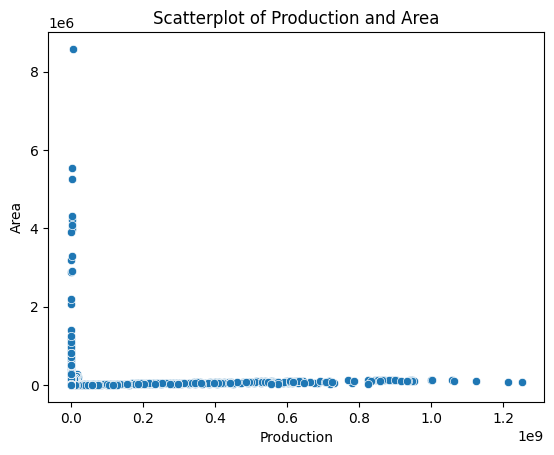

In [138]:
sns.scatterplot(data, x="Production", y="Area")
plt.xlabel('Production')
plt.ylabel('Area')
plt.title('Scatterplot of Production and Area')
plt.show()

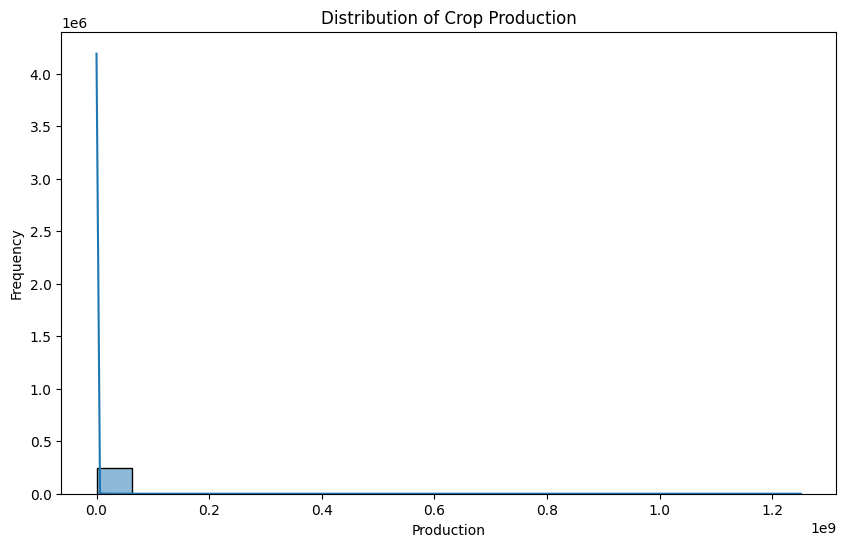

In [139]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Production'], bins=20, kde=True)
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.title('Distribution of Crop Production')
plt.show()


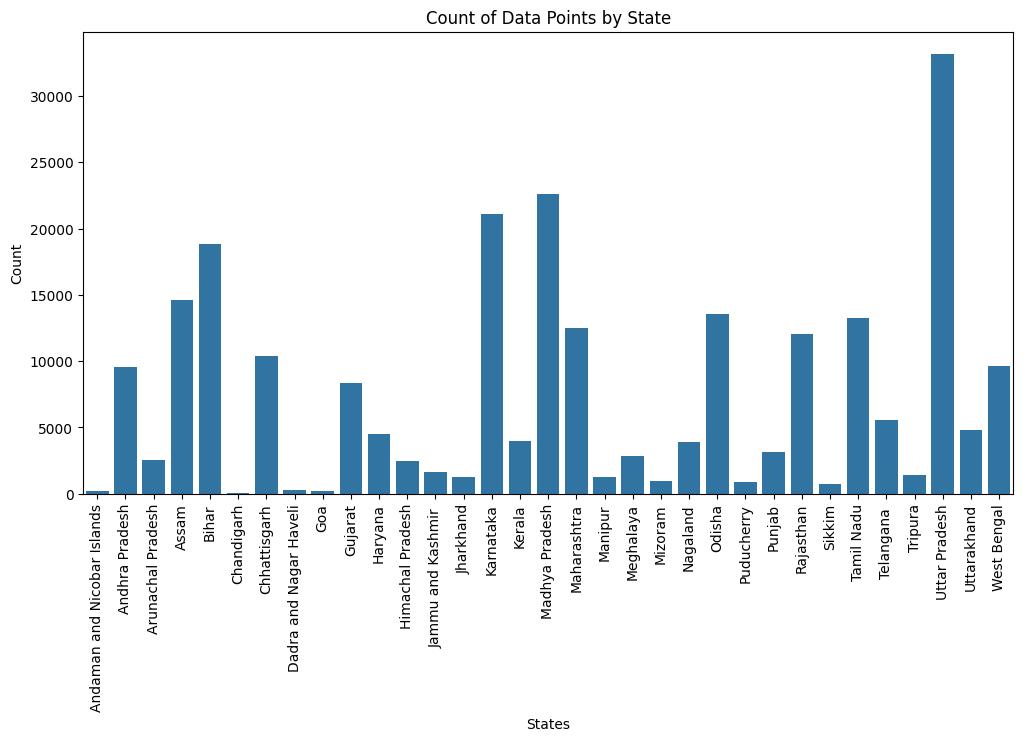

In [140]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State_Name', data=data)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Count of Data Points by State')
plt.show()


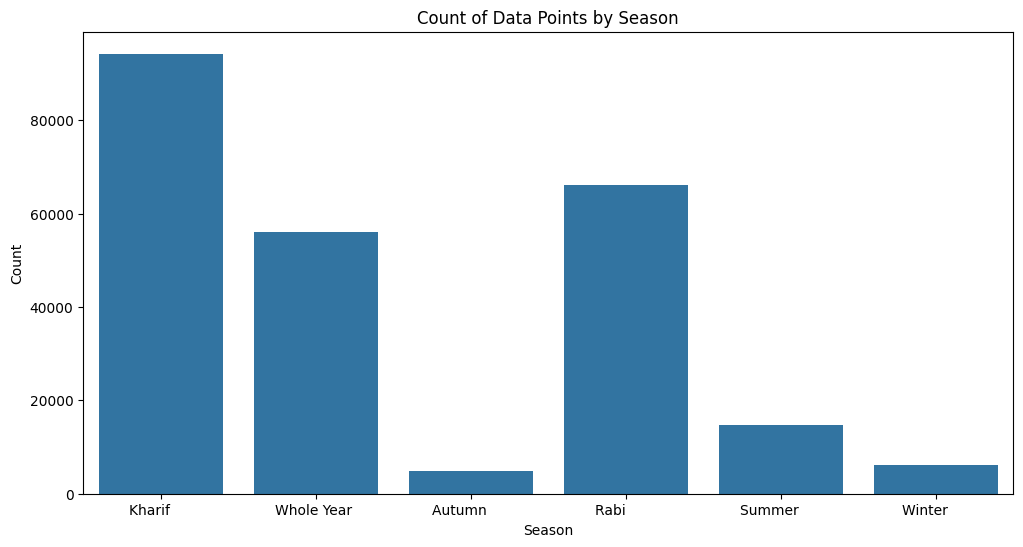

In [141]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', data=data)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Data Points by Season')
plt.show()


<ipython-input-142-d48a20c37a0c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='crest', fmt='.2f')


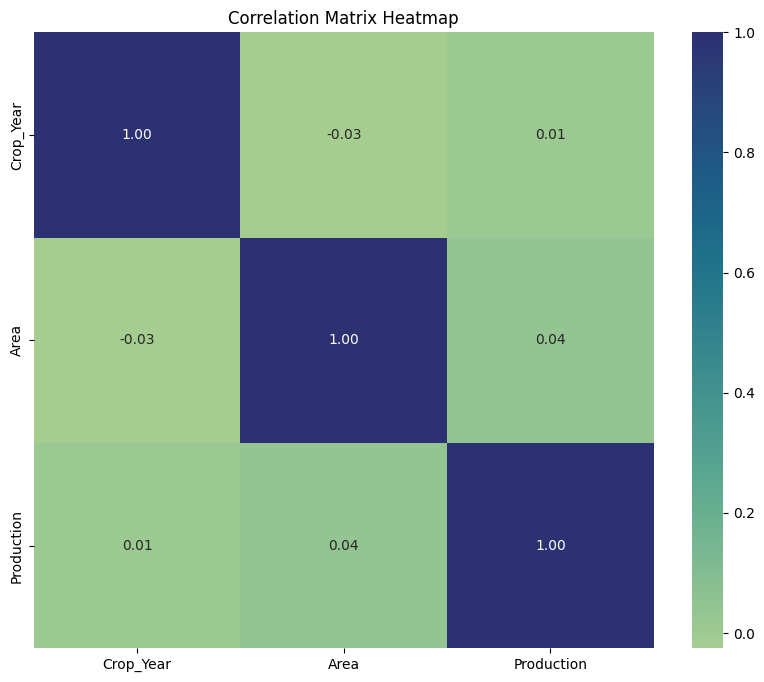

In [142]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


<Axes: xlabel='Crop_Year', ylabel='Production'>

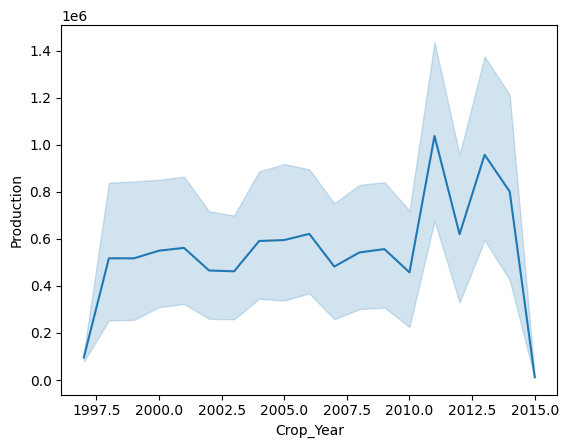

In [143]:
sns.lineplot(x=data["Crop_Year"],y=data["Production"])

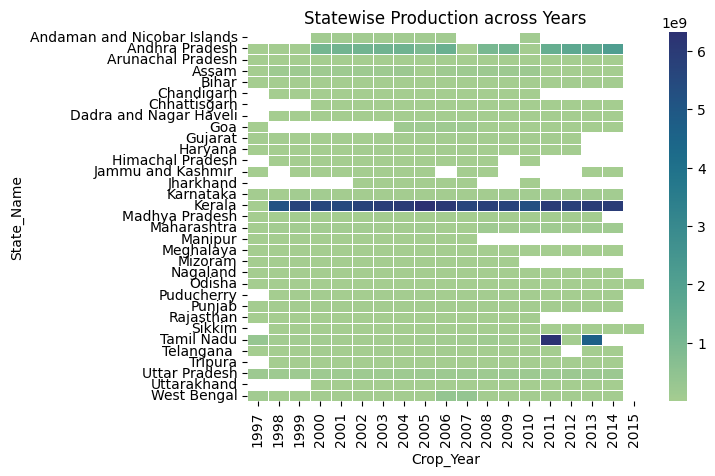

In [144]:
sns.heatmap(pd.pivot_table(data, index="State_Name", columns="Crop_Year", values="Production", aggfunc="sum"), cmap="crest", linewidth=0.5, yticklabels=True)
plt.title("Statewise Production across Years")
plt.show()

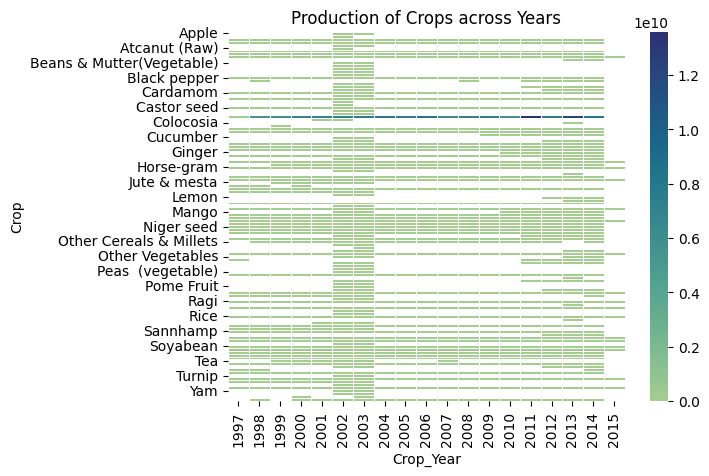

In [145]:
sns.heatmap(pd.pivot_table(data, index="Crop", columns="Crop_Year", values="Production", aggfunc="sum"), cmap="crest", linewidth=0.5)
plt.title("Production of Crops across Years")
plt.show()

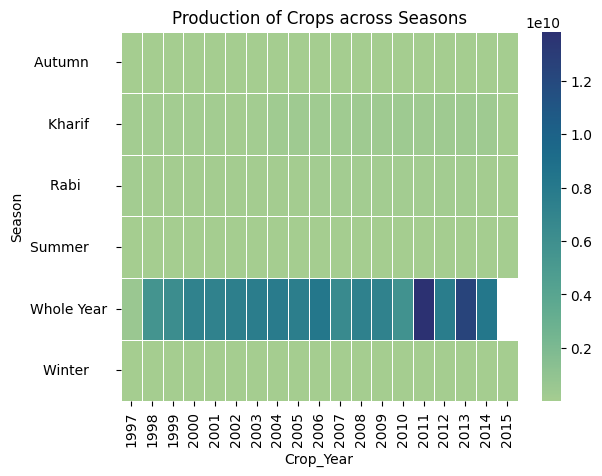

In [146]:
sns.heatmap(pd.pivot_table(data, index="Season", columns="Crop_Year", values="Production", aggfunc="sum"), cmap="crest", linewidth=0.5)
plt.title("Production of Crops across Seasons")
plt.show()

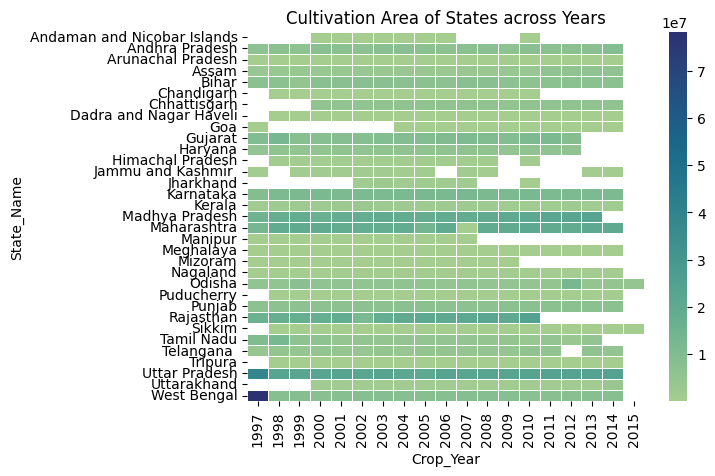

In [147]:
sns.heatmap(pd.pivot_table(data, index="State_Name", columns="Crop_Year", values="Area", aggfunc="sum"), cmap="crest", linewidth=0.5, yticklabels=True)
plt.title("Cultivation Area of States across Years")
plt.show()

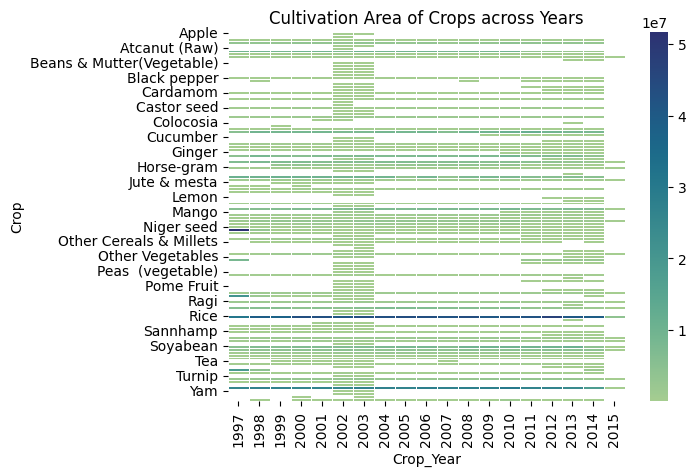

In [148]:
sns.heatmap(pd.pivot_table(data, index="Crop", columns="Crop_Year", values="Area", aggfunc="sum"), cmap="crest", linewidth=0.5)
plt.title("Cultivation Area of Crops across Years")
plt.show()

## Analysis of Maharashtra's crop yield data

In [149]:
data_maha = data[data["State_Name"]=="Maharashtra"]
data_maha.drop("State_Name", axis=1)

,District_Name,Crop_Year,Season,Crop,Area,Production
125191,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0
125192,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0
125193,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0
125194,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0
125195,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0
...,...,...,...,...,...,...
137814,YAVATMAL,2014,Rabi,Jowar,4000.0,3300.0
137815,YAVATMAL,2014,Rabi,Maize,1300.0,200.0
137816,YAVATMAL,2014,Rabi,Wheat,29100.0,26800.0
137817,YAVATMAL,2014,Summer,Groundnut,9400.0,11500.0


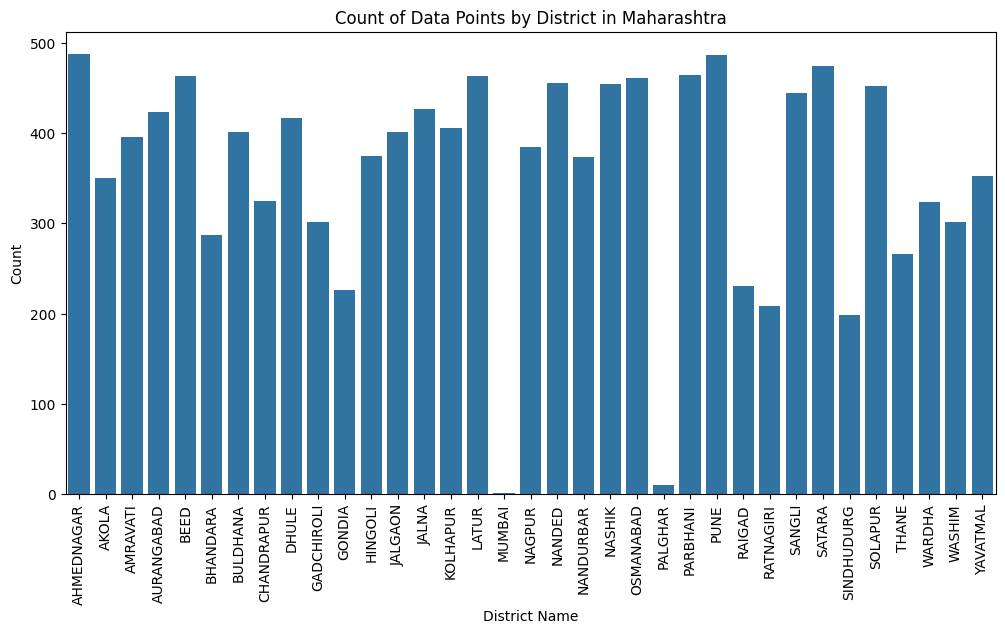

In [150]:
plt.figure(figsize=(12, 6))
sns.countplot(x='District_Name', data=data_maha)
plt.xlabel('District Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Data Points by District in Maharashtra')
plt.show()

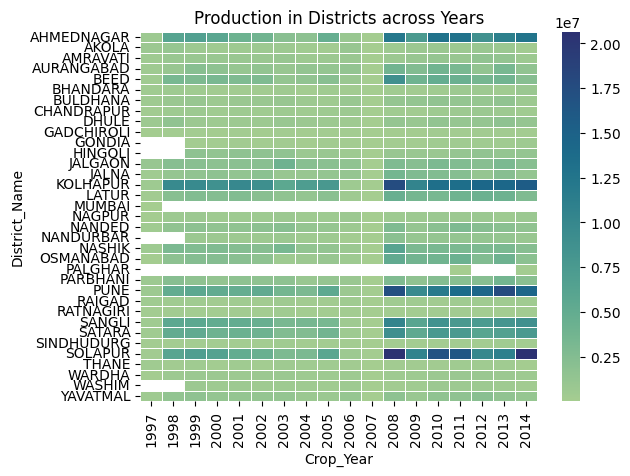

In [151]:
sns.heatmap(pd.pivot_table(data_maha, index="District_Name", columns="Crop_Year", values="Production", aggfunc="sum"), cmap="crest", linewidth=0.5, yticklabels=True)
plt.title("Production in Districts across Years")
plt.show()

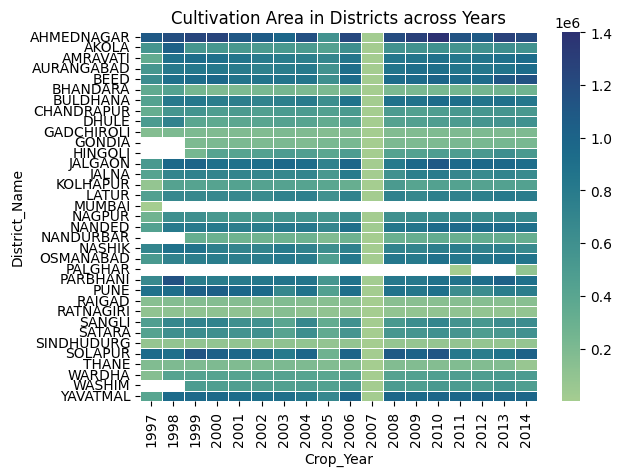

In [152]:
sns.heatmap(pd.pivot_table(data_maha, index="District_Name", columns="Crop_Year", values="Area", aggfunc="sum"), cmap="crest", linewidth=0.5, yticklabels=True)
plt.title("Cultivation Area in Districts across Years")
plt.show()

Text(0.5, 1.0, 'Production across years in Maharashtra')

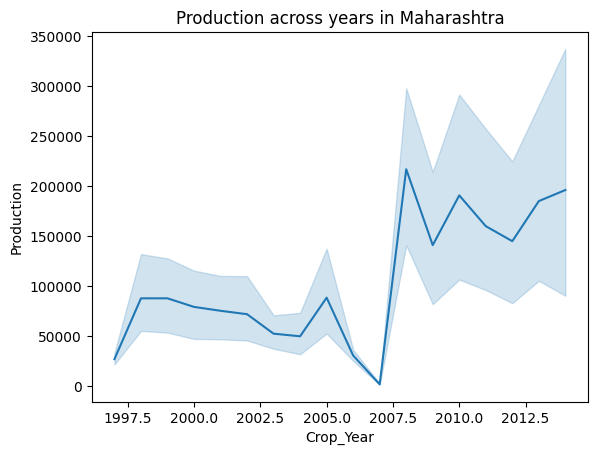

In [153]:
sns.lineplot(x=data_maha["Crop_Year"],y=data_maha["Production"])
plt.title("Production across years in Maharashtra")

Text(0.5, 1.0, 'Production across Area in Maharashtra')

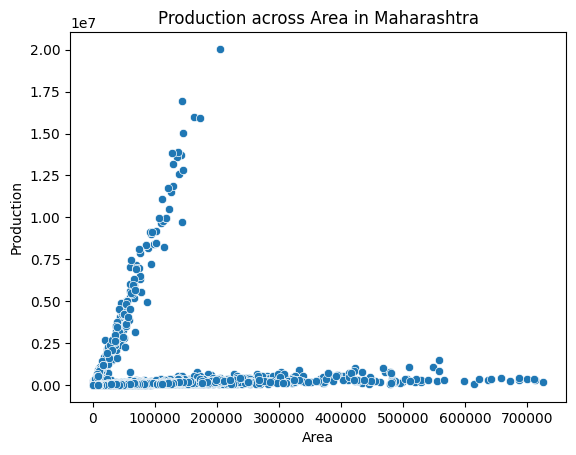

In [154]:
sns.scatterplot(data_maha, x="Area", y="Production")
plt.title("Production across Area in Maharashtra")

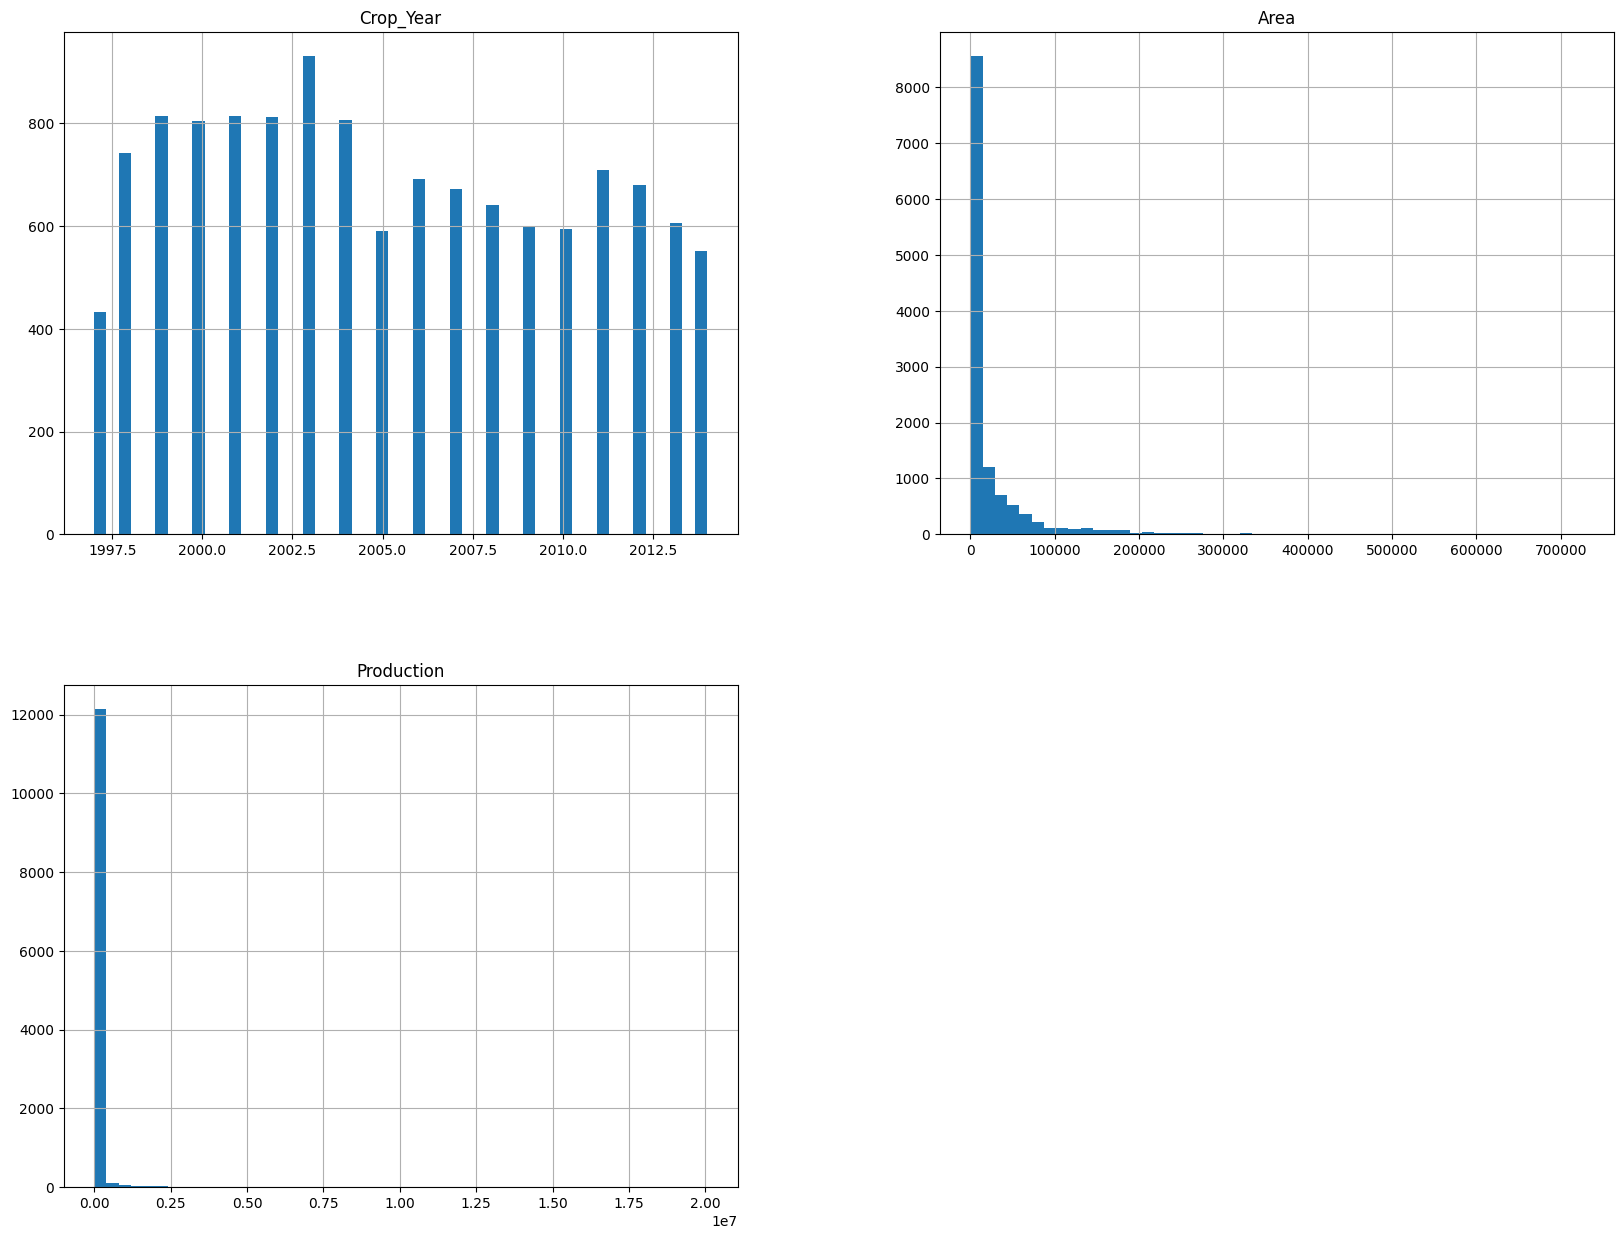

In [155]:
data_maha.hist(bins=50, figsize=(20, 15))
plt.show()

array([[<Axes: xlabel='Production', ylabel='Production'>,
        <Axes: xlabel='Area', ylabel='Production'>,
        <Axes: xlabel='Crop_Year', ylabel='Production'>],
       [<Axes: xlabel='Production', ylabel='Area'>,
        <Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Crop_Year', ylabel='Area'>],
       [<Axes: xlabel='Production', ylabel='Crop_Year'>,
        <Axes: xlabel='Area', ylabel='Crop_Year'>,
        <Axes: xlabel='Crop_Year', ylabel='Crop_Year'>]], dtype=object)

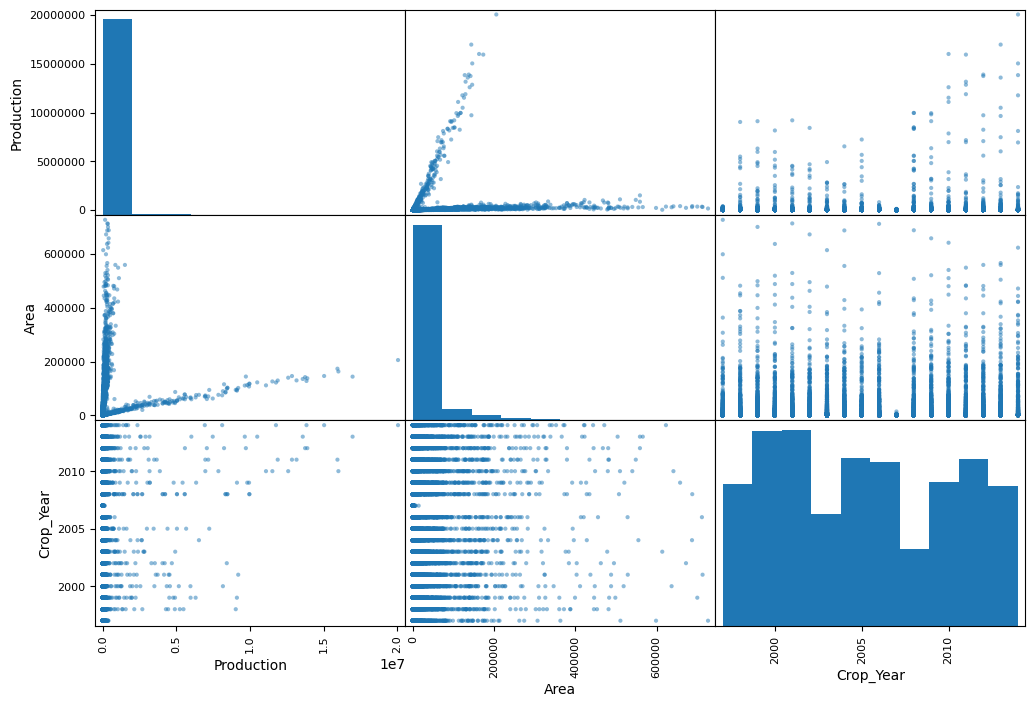

In [156]:
from pandas.plotting import scatter_matrix
attributes = ["Production", "Area", "Crop_Year"]
scatter_matrix(data_maha[attributes], figsize=(12, 8))

A kind of positive correlation is seen only between Area and Production. Crop year doesn't have any correlation with the Production.

## Building the ML model

In [157]:
data_maha=data_maha.drop(["Crop_Year", "State_Name"], axis=1)
data_maha=data_maha.reset_index()
data_maha

,index,District_Name,Season,Crop,Area,Production
0,125191,AHMEDNAGAR,Autumn,Maize,1.0,1113.0
1,125192,AHMEDNAGAR,Kharif,Arhar/Tur,17600.0,6300.0
2,125193,AHMEDNAGAR,Kharif,Bajra,274100.0,152800.0
3,125194,AHMEDNAGAR,Kharif,Gram,40800.0,18600.0
4,125195,AHMEDNAGAR,Kharif,Jowar,900.0,1100.0
...,...,...,...,...,...,...
12491,137814,YAVATMAL,Rabi,Jowar,4000.0,3300.0
12492,137815,YAVATMAL,Rabi,Maize,1300.0,200.0
12493,137816,YAVATMAL,Rabi,Wheat,29100.0,26800.0
12494,137817,YAVATMAL,Summer,Groundnut,9400.0,11500.0


<Axes: >

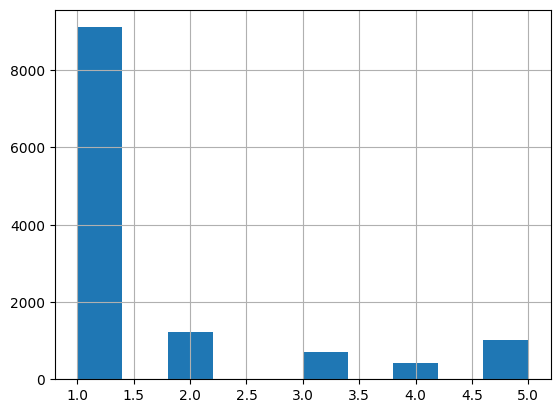

In [158]:
data_maha["area_cat"] = pd.cut(data_maha["Area"], bins=[0, 20000, 40000, 60000, 80000, np.inf], labels=[1, 2, 3, 4, 5])
data_maha["area_cat"].hist()

Data Preparation for the ML model

In [159]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(data_maha, data_maha["area_cat"]):
  strata_train_set = data_maha.loc[train_index]
  strata_test_set = data_maha.loc[test_index]

In [160]:
print(strata_train_set["area_cat"].value_counts() / len(strata_train_set))
print(strata_test_set["area_cat"].value_counts() / len(strata_test_set))

1    0.729148
2    0.097901
5    0.082251
3    0.057087
4    0.033612
Name: area_cat, dtype: float64
1    0.7296
2    0.0976
5    0.0824
3    0.0568
4    0.0336
Name: area_cat, dtype: float64


In [161]:
for set_ in (strata_train_set, strata_test_set):
  set_.drop(["area_cat", "index"], axis=1, inplace=True)

In [162]:
train_ds = strata_train_set.drop("Production", axis=1)
labels = strata_train_set["Production"].copy()

In [163]:
print(train_ds)
print(labels)

      District_Name       Season                     Crop      Area
11955        WASHIM  Whole Year                     Mango     660.0
10544        SATARA  Rabi                           Jowar  123600.0
11015       SOLAPUR  Summer                         Maize    1600.0
1635     AURANGABAD  Rabi                            Gram   42900.0
9875         SANGLI  Kharif       Other Cereals & Millets     200.0
...             ...          ...                      ...       ...
5186          JALNA  Kharif                         Maize   60800.0
3522          DHULE  Rabi                            Gram   42300.0
10218        SATARA  Kharif                      Soyabean   13600.0
2155       BHANDARA  Summer                          Rice   13500.0
9862         SANGLI  Whole Year                    Banana     100.0

[11246 rows x 4 columns]
11955      1220.0
10544     70700.0
11015      2500.0
1635      32600.0
9875        100.0
           ...   
5186     175700.0
3522      53260.0
10218     3360

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                          ('std_scaler', StandardScaler()),])

num_attribs = ["Area"]
cat_attribs = ["District_Name", "Season", "Crop"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [168]:
train_ds_prepared = full_pipeline.fit_transform(train_ds)

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression()
lin_reg.fit(train_ds_prepared, labels)

LinearRegression()

In [170]:
from sklearn.metrics import mean_squared_error

test_ds = strata_test_set.drop("Production", axis=1)
test_labels = strata_test_set["Production"].copy()

test_ds_prepared = full_pipeline.transform(test_ds)

predictions = lin_reg.predict(test_ds_prepared)

lin_mse = mean_squared_error(test_labels, predictions)
lin_final_rmse = np.sqrt(lin_mse)
print(lin_final_rmse)

921559.4923353051


In [174]:
from sklearn.ensemble import RandomForestRegressor

tree_reg = RandomForestRegressor()
tree_reg.fit(train_ds_prepared, labels)

tree_preds = tree_reg.predict(test_ds_prepared)

tree_mse = mean_squared_error(test_labels, tree_preds)
tree_final_rmse = np.sqrt(tree_mse)
print(tree_final_rmse)

201586.85814625258


In [176]:
comp_dict = {"tree_preds": tree_preds, "true production": test_labels}
df = pd.DataFrame(comp_dict)
print(df)

          tree_preds  true production
10262     968.000000            800.0
8245   108589.000000         167400.0
840     32568.000000          19400.0
11353     479.000000            600.0
2524      775.810238            700.0
...              ...              ...
10517      40.594784             20.0
2629     2007.140000           1800.0
432     39668.000000          21700.0
11410     212.926227            200.0
5655    33350.000000          31200.0

[1250 rows x 2 columns]
